In [2]:
import pandas as pd
import numpy as np
import jieba.analyse#用于分词
from sklearn.model_selection import train_test_split#用于分割数据集
from sklearn.feature_extraction.text import TfidfVectorizer#用于特征提取
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [3]:
#读取数据
data=pd.read_excel('社会科学标题数据集-200/data_200_each_discipline.xlsx')
data.columns = ['ID','Title','Subject']
print(data.head())
# 读取title数据
title_list=data['Title'].tolist()
print(title_list[0:10])
# 所有类别(重复)
category_list=data['Subject'].tolist()

   ID                    Title Subject
0   0     甲午中日战争至甲辰日俄战争期间东北亚局势    人文地理
1   1           以事业为己任——记周光复教授    人文地理
2   2         大饥荒年代非正常死亡的另一种计算    人文地理
3   3               鲁迅小说中的女性世界    人文地理
4   4  基于语料库的英汉光亮类词语研究：认知语义学视角    人文地理
['甲午中日战争至甲辰日俄战争期间东北亚局势', '以事业为己任——记周光复教授', '大饥荒年代非正常死亡的另一种计算', '鲁迅小说中的女性世界', '基于语料库的英汉光亮类词语研究：认知语义学视角', '按摩院里盲人师傅的心酸幽默话', '骆家辉:开动美国经济引擎的华裔部长', '南北朝时期民族迁移引起的语音变迁——以晋代吴方言的韵母为例', '宋代女性文学中食物意象的审美文化阐释——评《华夏饮食文化》', '一举多得的“城市作业本”']


In [4]:
#所有类别
category=(list(set(category_list)))
print(category)

['管理学', '语言学', '新闻传播学', '心理学', '政治学', '考古学', '图书馆、情报与文献学', '民族学', '历史学', '文学', '环境科学', '经济学', '人文地理', '哲学', '统计学', '法学', '宗教学', '社会学', '艺术学', '教育学', '体育学', '马克思主义']


In [5]:
stop=pd.read_csv('stop.txt',index_col=False,quoting=3,sep="\t",names=['stopword'],encoding='utf-8')
stopwords=stop['stopword'].values.tolist()
#分词
title_list_cut=[]
for title in title_list:
    word=jieba.lcut(title)
    title_list_cut.append(' '.join(word))

print(title_list_cut[0:10])
print(category_list[0:10])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.124 seconds.
Prefix dict has been built successfully.


['甲午 中日战争 至 甲辰 日俄战争 期间 东北亚 局势', '以 事业 为 己任 — — 记周 光复 教授', '大 饥荒 年代 非正常 死亡 的 另 一种 计算', '鲁迅 小说 中 的 女性 世界', '基于 语料库 的 英汉 光亮 类 词语 研究 ： 认知 语义学 视角', '按摩院 里 盲人 师傅 的 心酸 幽默 话', '骆家辉 : 开动 美国 经济 引擎 的 华裔 部长', '南北朝 时期 民族 迁移 引起 的 语音 变迁 — — 以 晋代 吴方言 的 韵母 为例', '宋代 女性 文学 中 食物 意象 的 审美 文化 阐释 — — 评 《 华夏 饮食文化 》', '一举多得 的 “ 城市 作业本 ”']
['人文地理', '人文地理', '人文地理', '人文地理', '人文地理', '人文地理', '人文地理', '人文地理', '人文地理', '人文地理']


In [6]:
# 进行数据分割
x_train,x_test,y_train,y_test=train_test_split(title_list_cut,category_list,test_size=0.4,random_state=2)
# 对数据集进行特征抽取
tf = TfidfVectorizer(stop_words=stopwords)#停用词
x_train = tf.fit_transform(x_train)
x_test = tf.transform(x_test)

# 对数据集进行特征选择
f_classif(x_train,y_train)
selector = SelectKBest(f_classif, k=6000)
selector.fit(x_train, y_train)
x_train = selector.transform(x_train)
x_test = selector.transform(x_test)

print(x_train.shape)
print(tf.get_stop_words)

(2640, 6000)
<bound method _VectorizerMixin.get_stop_words of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['.', '———', '》），', '）÷（１－', '”，', '）、', '＝（', ':',
                            '→', '℃ ', '&', '*', '一一', '~~~~', '’', '. ', '『',
                            '.一', './', '-- ', '』', '＝″', '【', '［＊］', '｝＞',
                            '［⑤］］', '［①Ｄ］', 'ｃ］', 'ｎｇ昉', '＊', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)>


d:\Python\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['exp', 'lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [7]:
svc=LinearSVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
print('svc',svc.score(x_test,y_test))

svc 0.50625


In [8]:
#模型评估
y_true=y_test
y_pred=svc.predict(x_test)
print(confusion_matrix(y_true,y_pred,labels=category))

[[56  0  1  2  3  1  3  0  1  0  1  4  0  1  2  1  0  2  0  2  0  0]
 [ 1 36  2  6  0  3  0  2  1  9  1  1  3  2  0  0  2  1  0  4  0  1]
 [ 1  2 56  3  2  2  1  0  0  3  3  1  0  0  5  0  0  1  1  0  0  2]
 [ 0  3  2 54  1  2  0  1  0  0  3  1  0  0  1  1  0  0  0  8  2  0]
 [ 3  0  1  1 39  0  0  1  2  0  0  0  1  5  1  4  0  0  0  0  0 11]
 [ 0  1  0  0  1 37  3 10  7  3  3  5  3  3  0  3  6  1  6  0  0  0]
 [ 5  0  3  0  1  5 46  1  3  0  3  3  0  1  3  1  0  2  0  1  0  0]
 [ 2  2  1  0  1  3  1 41  3  1  2  1  4  2  1  1  1  2  3  2  0  2]
 [ 2  2  0  1 10  6  1  8 16  4  1  1  8  4  3  1  3  3  3  2  0  4]
 [ 1  5  2  2  2  4  0  0  0 47  3  0  1  5  0  0  1  2  2  3  0  5]
 [ 4  0  0  1  0  2  1  1  1  0 63  4  0  0  5  0  0  0  0  1  1  0]
 [ 4  2  0  1  2  3  5  1  0  0  3 29  1  1 14  2  1  3  1  2  0  1]
 [ 0  6  2  3  3  8  1 10  5  4  5  4  9  1  3  1  0  2  5  3  1  2]
 [ 0  2  1  2  5  4  0  1  3  1  0  2  3 34  0  1  2  5  1  1  1  9]
 [ 1  1  3 10  4  2  2  0  1  0  3

In [9]:
print(classification_report(y_true,y_pred,labels=category))

              precision    recall  f1-score   support

         管理学       0.63      0.70      0.66        80
         语言学       0.47      0.48      0.48        75
       新闻传播学       0.64      0.67      0.66        83
         心理学       0.48      0.68      0.57        79
         政治学       0.44      0.57      0.50        69
         考古学       0.31      0.40      0.35        92
  图书馆、情报与文献学       0.58      0.59      0.59        78
         民族学       0.45      0.54      0.49        76
         历史学       0.29      0.19      0.23        83
          文学       0.54      0.55      0.55        85
        环境科学       0.61      0.75      0.67        84
         经济学       0.39      0.38      0.39        76
        人文地理       0.20      0.12      0.15        78
          哲学       0.47      0.44      0.45        78
         统计学       0.40      0.42      0.41        81
          法学       0.56      0.41      0.47        78
         宗教学       0.67      0.47      0.55        81
         社会学       0.55    

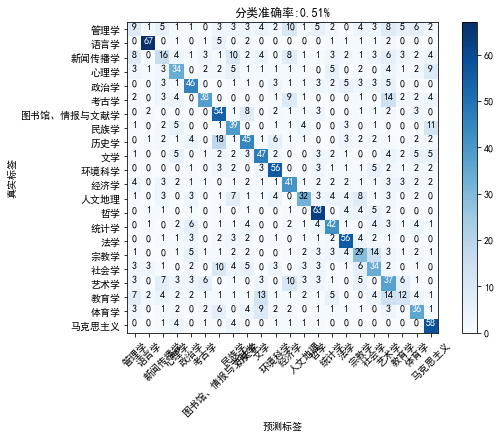

In [11]:
import itertools
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']="SimHei"
plt.rcParams['axes.unicode_minus']=False
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('真实标签')
    plt.xlabel('预测标签')
    plt.show()


cm= confusion_matrix(y_test, y_pred)
title="分类准确率:{:.2f}%".format(svc.score(x_test,y_test))
plot_confusion_matrix(cm,classes=category,title=title)